## Titanic Survival Prediction

### Project Summary

This project focus on **predicting the survival of passengers on the Titanic** using machine learning techniques. This is a **supervised learning** problem where the goal is to classify passengers as either **surviving (1) or not surviving (0)** based on their features (e.g., age, gender, class, etc.).



### Type of Learning & Algorithms

- The task is a **classification problem** because the output variable (survival) is categorical.
- The project applies **supervised learning**, as labeled data (passenger survival status) is available.
- Different machine learning models are explored, including:
  - **Logistic Regression**
  - **Decision Trees**
  - **Random Forest**
  - **Support Vector Machines (SVM)**
  - **K-Nearest Neighbors (KNN)**
  - **Naive Bayes**
  - **Ensemble Methods (combining multiple models)**

The notebooks also implement **hyperparameter tuning and cross-validation** to optimize model performance.



### Type of Task

- The project follows a **data science workflow**, including:
  1. **Problem Definition** – Understanding the dataset and defining the objective.
  2. **Data Preprocessing** – Cleaning, handling missing values, and feature engineering.
  3. **Exploratory Data Analysis (EDA)** – Identifying trends and correlations.
  4. **Model Selection & Training** – Comparing multiple classifiers.
  5. **Hyperparameter Tuning & Validation** – Improving model performance.
  6. **Evaluation** – Measuring accuracy, precision, recall, etc.
  7. **Prediction** – Making final survival predictions on test data.



### Motivation and Goal of the Project

The primary **motivation** behind this project is to apply **machine learning techniques** to a well-known historical event—the sinking of the Titanic—to predict which passengers survived based on various features such as age, gender, class, and ticket fare. The **Titanic dataset** is widely used in data science because it is easy to understand and serves as a great starting point for classification problems.

The **goal** of this project is to develop a predictive model that can accurately classify whether a passenger survived or not. This involves:
- Understanding **patterns** in **survival rates** based on different features.
- Building and comparing **multiple classification models** to identify the best-performing algorithm.
- Using **feature engineering** and **hyperparameter tuning** to improve model accuracy.

### Data Source and Citation

The dataset used in this project is the **Titanic dataset**, which is publicly available on **Kaggle** as part of the [Titanic: Machine Learning from Disaster competition](https://www.kaggle.com/competitions/titanic/data). The dataset originates from **passenger records of the Titanic** collected during the ship's ill-fated voyage in 1912. The data was compiled from multiple sources, including the British Board of Trade inquiry reports, newspaper archives, and other historical records.

The dataset includes information about passengers such as:
- **Demographic details** (Name, Age, Gender)
- **Ticket and class details** (Passenger Class, Ticket Number, Fare)
- **Family relationships aboard** (Number of siblings/spouses and parents/children)
- **Survival status** (1 = Survived, 0 = Did not survive)





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import numpy as np

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


### Data Analysis

In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

print(train_df.columns.values)
train_df.head()

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

### **Data Description**
The training dataset contains information about **891 passengers** from the Titanic disaster. It is structured in a tabular format with **12 key features**

The testing dataset contains information about **418 passengers** from the Titanic disaster. It is structured in a tabular format with **11 key features**, the target feature is `Survived`

#### **Dataset Properties**
- **Number of Rows (Samples):** 891
- **Number of Columns (Features):** 12
- **Feature Types:**
  - **Categorical Features:**  
    - `Sex` (Male/Female)  
    - `Embarked` (Port of embarkation: C, Q, S, which are short for Cherbourg (France), Queenstown (Ireland), Southampton (England))  
    - `Pclass` (Ticket class: 1st, 2nd, 3rd)  
  - **Numerical Features:**  
    - `Age` (Passenger's age)  
    - `Fare` (Ticket price)  
    - `SibSp` (Number of siblings/spouses aboard)  
    - `Parch` (Number of parents/children aboard)  
  - **Binary Target Feature:**  
    - `Survived` (1 = Survived, 0 = Did not survive)  
  - **Text Features:**  
    - `Name` (Full name, including title like 'Mr')  
    - `Ticket` (Ticket number)  
    - `Cabin` (Cabin number, many missing values)  
  - **ID Feature:**  
    - `PassengerId` (Unique identifier)

#### **Missing Values**
- `Age` has some missing values.
- `Cabin` has a high number of missing values.
- `Embarked` has a few missing values.

### Data Cleaning Process

#### Handling Missing Values
The dataset contained missing values in several key columns. The following actions were taken:

* **Cabin (Train + Test):**  
  - **Issue:** The `Cabin` feature had a significant number of missing values.  
  - **Action:** This feature was dropped because most of the values were missing, making imputation unreliable.
  - **Reasoning:** Since cabin numbers were not essential for survival prediction, removing it helped reduce data noise without losing much valuable information.
* **Embarked (Train only):**  
  - **Issue:** 2 missing values in the `Embarked` column.  
  - **Action:** Missing values were filled using the most common embarkation point (`mode` value).  
  - **Reasoning:** Since there were very few missing values, replacing them with the most frequent value helped retain data integrity.
* **Fare (Test only):**  
  - **Issue:** 1 missing values in the `Fare` column.  
  - **Action:** Missing values were filled using the median fare value 
  - **Reasoning:** Since there were one missing value, replacing it with the median value helped retain data integrity.




In [4]:
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)
train_df.fillna({'Embarked': train_df['Embarked'].mode()[0]}, inplace=True)
test_df.fillna({'Fare': test_df['Fare'].dropna().median()}, inplace=True)


#### Handling Missing Values (Continue)
- **Age (Train + Test):**  
  - **Issue:** Several rows had missing values in the `Age` column.  
  - **Action:** Missing values were **imputed** using the median age of passengers based on their `Pclass` and `Sex`.  
  - **Reasoning:** Age is an important factor in survival (e.g., "women and children first"), and dropping rows would reduce the dataset unnecessarily.

We can consider three methods to complete a numerical continuous feature.

1. A simple way is to generate random numbers between mean and [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation).

2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using [median](https://en.wikipedia.org/wiki/Median) values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

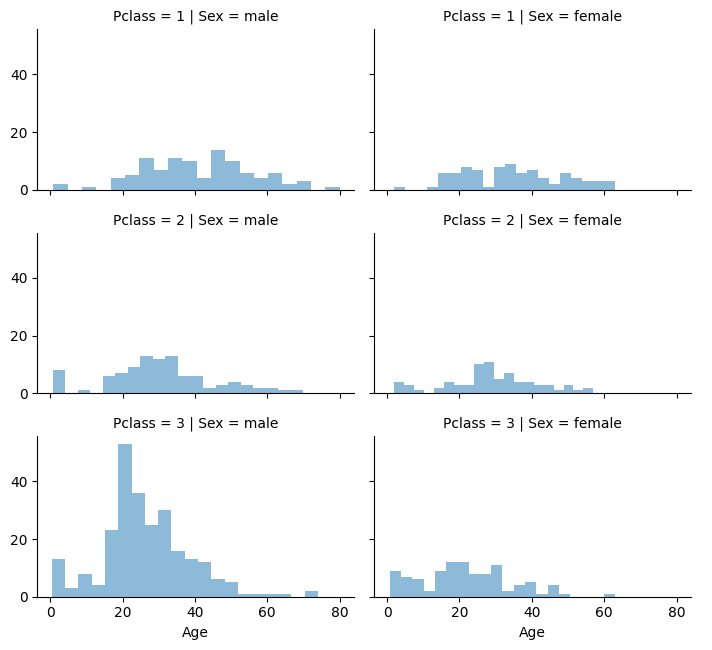

In [5]:
grid = sns.FacetGrid(train_df[train_df['Age'].notna()], row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

plt.show()

From the plot above, we can see the age distribution differently for Class and Gender. So the guessed Age values are better based on the median of Pclass and Gender combinations.






In [6]:
guess_ages = {}
for dataset in [train_df, test_df]:
    for i in train_df['Sex'].unique():
        for j in train_df['Pclass'].unique():
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[(i,j)] = int( age_guess/0.5 + 0.5 ) * 0.5
            

    for i in train_df['Sex'].unique():
        for j in train_df['Pclass'].unique():
            dataset.loc[(dataset.Age.isna()) & (dataset.Sex == i) & (dataset.Pclass == j),'Age'] = guess_ages[(i,j)]

    dataset['Age'] = dataset['Age'].astype(int)


### Detecting and Handling Outliers
Now let's looking close to the Age and Fare distribution. And see if there are any outliers

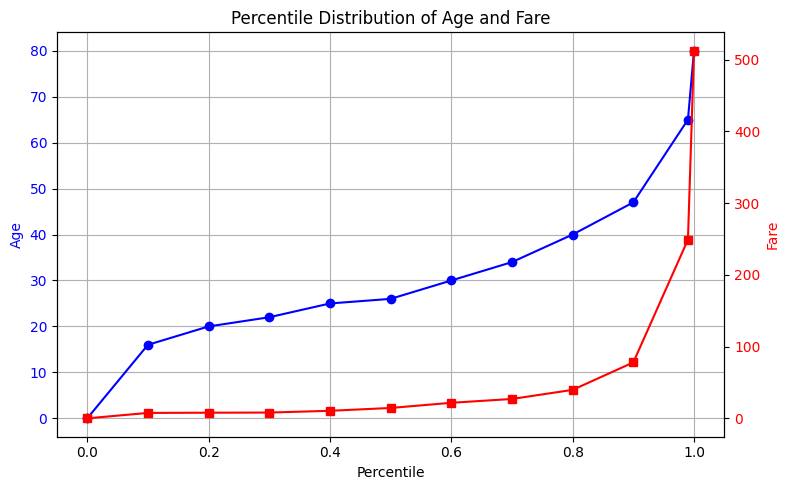

In [7]:
# Compute percentiles
percentiles = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 1]
percentile_values = train_df[['Age', 'Fare']].quantile(percentiles)

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(8, 5))
ax2 = ax1.twinx()  # Create a second y-axis

# Plot Age on ax1 (left y-axis)
ax1.plot(percentiles, percentile_values['Age'], marker='o', color='b', label='Age')
ax1.set_ylabel('Age', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Plot Fare on ax2 (right y-axis)
ax2.plot(percentiles, percentile_values['Fare'], marker='s', color='r', label='Fare')
ax2.set_ylabel('Fare', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Labels and Title
ax1.set_xlabel('Percentile')
ax1.set_title('Percentile Distribution of Age and Fare')

# Grid and Layout
ax1.grid()
fig.tight_layout()

plt.show()


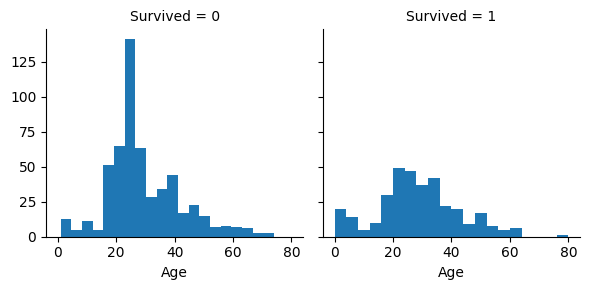

In [8]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

plt.show()

#### Observations:
- Infants (Age ≤ 4) had a high survival rate.  
- The oldest passenger (Age = 80) survived.  
- A significant number of passengers aged 15–25 did not survive.  
- The majority of passengers fall within the 15–35 age range.

**Issue**
 * **Fare prices varied significantly**, with fewer than **1%** of passengers paying as much as **$512**.  
 * Only a **small fraction (<1%)** of passengers were elderly, aged between **65-80**.

**Action**
- Introducing new feature AgeBand and FareBand and replace Age and Fare to those categorical values to adjust the extreme/outlier values.

**Reasoning**
* There's unlikely linear relationship for Age and Fare features to determine survival rate.
* In titanic scenario, we know some age groups (e.g. children and elders) have higher survival rate.
* Grouping fares allows for interpreting different levels of access to resources, which may influence survival likelihood.


### Feature Engineering for Age and Fare
Based on above observations, we're going to introducing new features for Age and Fare. First, let's work on Age and AgeBand

In [9]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False, observed=True).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [10]:
for dataset in [train_df, test_df]:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,S,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,71.2833,C,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,7.9250,S,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,53.1000,S,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,8.0500,S,"(32.0, 48.0]"


### Feature Engineering (continue)
Now, let's do the same for fare and fare band

In [11]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False, observed=True).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [12]:
for dataset in [train_df, test_df]:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['AgeBand', 'FareBand'], axis=1)
    
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,3,C
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,3,S
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,1,S
5,6,0,3,"Moran, Mr. James",male,1,0,0,330877,1,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,3,0,0,17463,3,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,0,3,1,349909,2,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,1,0,2,347742,1,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,0,1,0,237736,2,C


#### Result
Let's verify the outcome. Seems both the training and testing data has been cleaned

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          891 non-null    int64 
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    int64 
 10  Embarked     891 non-null    object
dtypes: int64(7), object(4)
memory usage: 76.7+ KB


In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Name         418 non-null    object
 3   Sex          418 non-null    object
 4   Age          418 non-null    int64 
 5   SibSp        418 non-null    int64 
 6   Parch        418 non-null    int64 
 7   Ticket       418 non-null    object
 8   Fare         418 non-null    int64 
 9   Embarked     418 non-null    object
dtypes: int64(6), object(4)
memory usage: 32.8+ KB


### **Exploratory Data Analysis (EDA)**

EDA was performed to understand patterns and relationships within the dataset. The following analyses were conducted:

#### Feature Distributions and Key Insights:
- **Age Distribution:** The majority of passengers were between **20 and 40 years old**, with some missing values that were handled earlier.
- **Gender and Survival:** Women had a **much higher survival rate** than men, confirming the "women and children first" evacuation rule.
- **Passenger Class and Survival:** First-class passengers had a **higher survival rate**, likely due to better access to lifeboats.



**How are numerical feature values distributed across the samples?**

Analyzing this distribution provides early insights, such as how well the training dataset represents the actual problem domain.

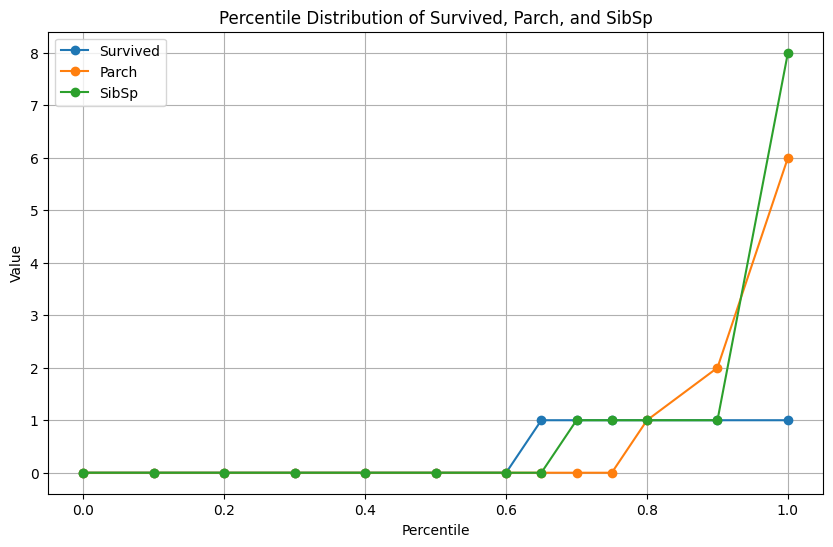

In [15]:
# Compute percentiles
percentiles = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.9, 1]
columns = ['Survived', 'Parch', 'SibSp']
percentile_values = {col: train_df[col].quantile(percentiles) for col in columns}

# Plot percentiles for all columns
plt.figure(figsize=(10, 6))
for col, percentiles in percentile_values.items():
    plt.plot(percentiles.index, percentiles.values, marker='o', label=col)

plt.xlabel('Percentile')
plt.ylabel('Value')
plt.title('Percentile Distribution of Survived, Parch, and SibSp')
plt.legend()
plt.grid()
plt.show()


**Key Insights from the Analysis:**  

- The dataset contains **891 samples**, representing **40%** of the total **2,224** passengers aboard the Titanic.  
- About **35%** of the samples survived, closely aligning with the actual survival rate of **32%**.  
- More than **75%** of passengers did not travel with parents or children.  
- Nearly **30%** of passengers had **siblings and/or a spouse** aboard.  

In [16]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,646


### Distribution of Categorical Features

- **Names**: Each name is unique in the dataset (total count = unique count = 891).  
- **Sex**: Consists of two categories, with males making up 65% of the dataset (most frequent = male, occurring 577 times out of 891).  
- **Cabin**: Contains multiple duplicate values, indicating that several passengers either shared a cabin or had repeated records.  
- **Embarked**: Has three distinct values, with 'S' being the most common port of embarkation.  
- **Ticket**: Shows a high duplication rate (22%), with 681 unique ticket values in the dataset.

### Correlating features

We'll need to look into the features and try to understand the patterns of survivate based on other features.
First, let's start with passenger class and gender. 
 - Females has very high suvival rate in 1st and 2nd class
 - Only less than 20% of the males in 2nd and 3rd class survived

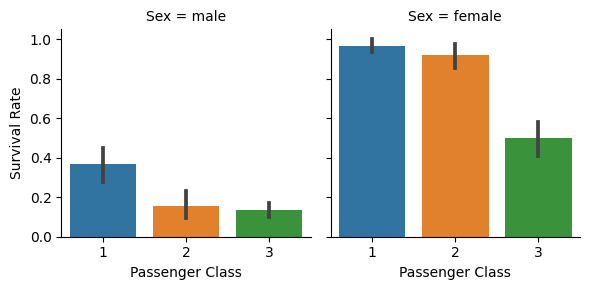

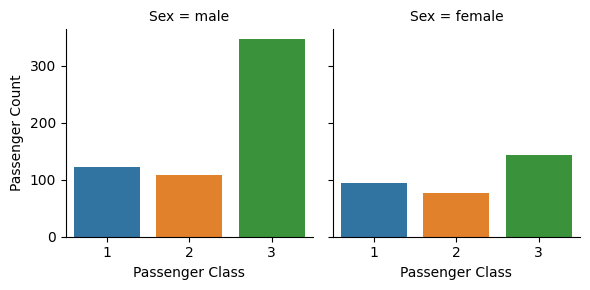

In [17]:
g1 = sns.catplot(data=train_df, x="Pclass", y="Survived", col="Sex", kind="bar", height=3, aspect=1)
g1.set_axis_labels("Passenger Class", "Survival Rate")
g2 = sns.catplot(data=train_df, x="Pclass", col="Sex", kind="count", height=3, aspect=1)
g2.set_axis_labels("Passenger Class", "Passenger Count")

plt.show()

Then, let's analyze survival rate patterns based on key factors such as passenger class, family relationships (parents/children and siblings/spouses), and more. The visualizations provide insights into how these factors influenced survival outcomes.

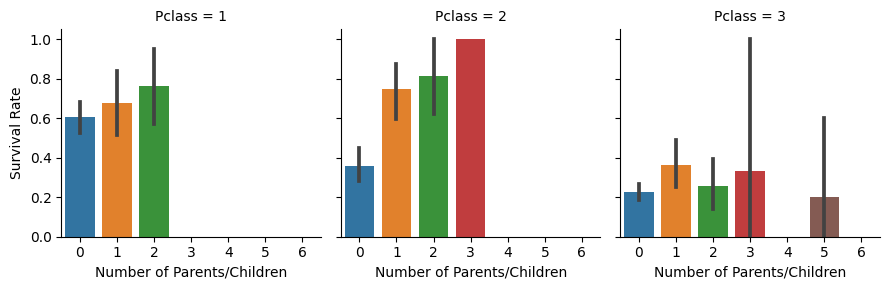

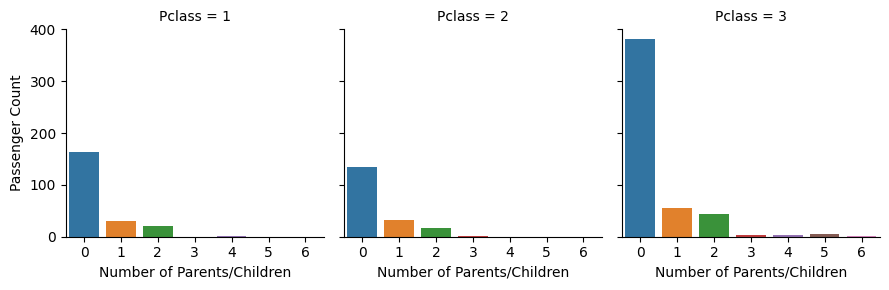

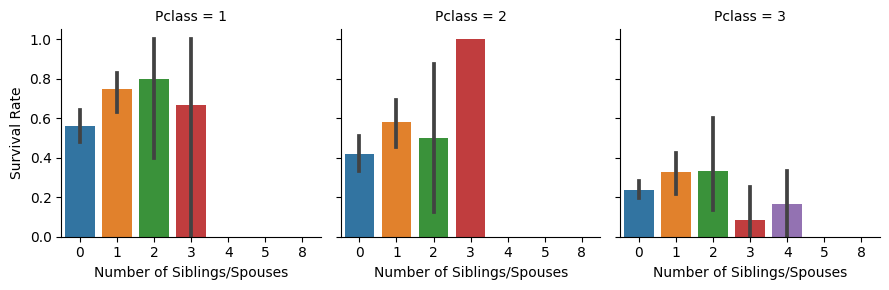

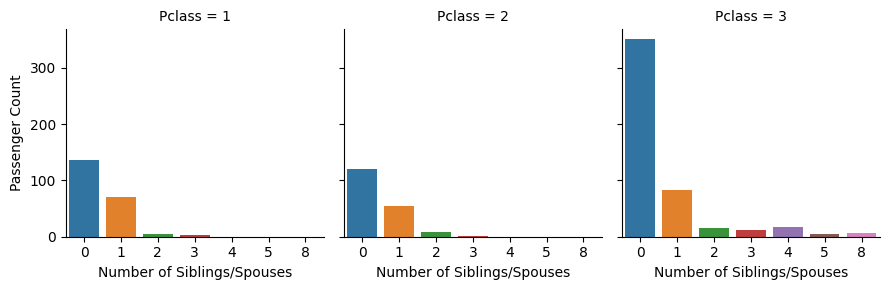

In [18]:
g1 = sns.catplot(data=train_df, x="Parch", y="Survived", col="Pclass", kind="bar", height=3, aspect=1)
g1.set_axis_labels("Number of Parents/Children", "Survival Rate")

g2 = sns.catplot(data=train_df, x="Parch", col="Pclass", kind="count", height=3, aspect=1)
g2.set_axis_labels("Number of Parents/Children", "Passenger Count")

g3 = sns.catplot(data=train_df, x="SibSp", y="Survived", col="Pclass", kind="bar", height=3, aspect=1)
g3.set_axis_labels("Number of Siblings/Spouses", "Survival Rate")

g4 = sns.catplot(data=train_df, x="SibSp", col="Pclass", kind="count", height=3, aspect=1)
g4.set_axis_labels("Number of Siblings/Spouses", "Passenger Count")

plt.show()

Currently, SibSp and Parch do not provide clear insights on their own. To gain a deeper understanding, we need to analyze these features in relation to Sex and Pclass.



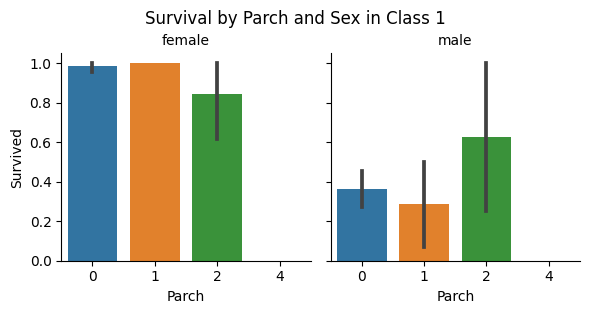

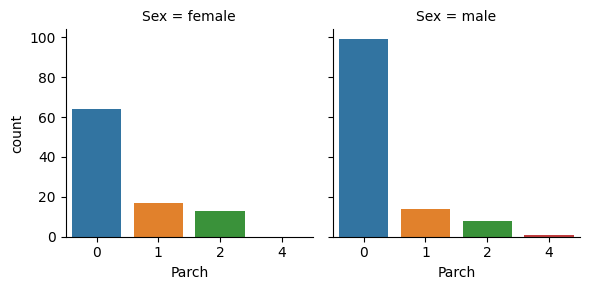

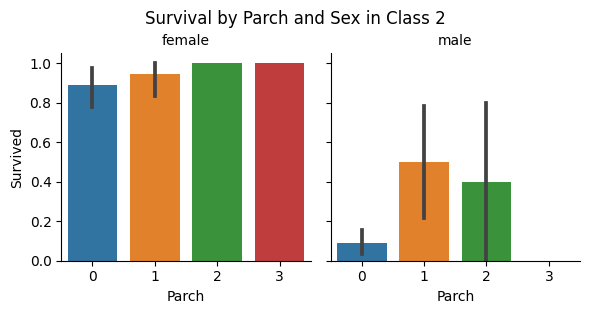

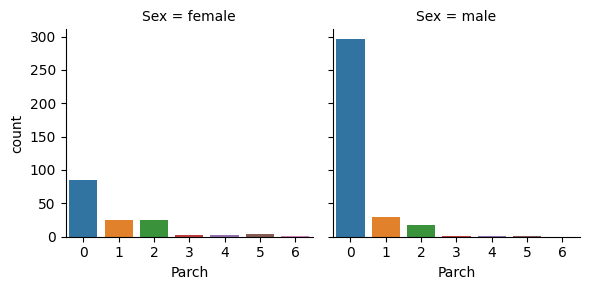

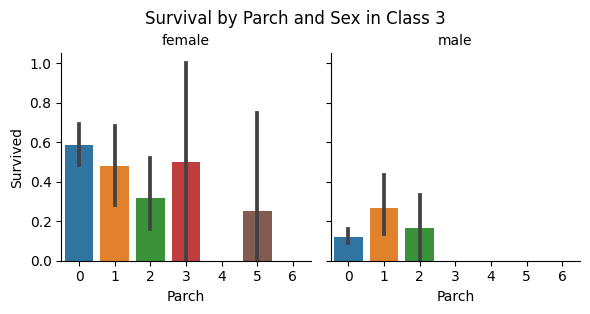

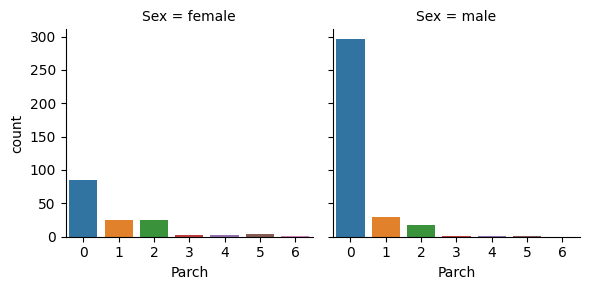

In [19]:
# Survival by Parch and Sex in Class 1
p1 = sns.catplot(data=train_df[train_df.Pclass == 1], x="Parch", y="Survived", col="Sex", kind="bar", height=3, aspect=1, col_order=["female", "male"])
p1.set_titles("{col_name}")
p1.fig.suptitle("Survival by Parch and Sex in Class 1", y=1.03)

sns.catplot(data=train_df[train_df.Pclass == 1], x="Parch", col="Sex", kind="count", height=3, aspect=1, col_order=["female", "male"])

# Survival by Parch and Sex in Class 2
p = sns.catplot(data=train_df[train_df.Pclass == 2], x="Parch", y="Survived", col="Sex", kind="bar", height=3, aspect=1, col_order=["female", "male"])
p.set_titles("{col_name}")
p.fig.suptitle("Survival by Parch and Sex in Class 2", y=1.03)

sns.catplot(data=train_df[train_df.Pclass == 3], x="Parch", col="Sex", kind="count", height=3, aspect=1, col_order=["female", "male"])

# Survival by Parch and Sex in Class 3
p2 = sns.catplot(data=train_df[train_df.Pclass == 3], x="Parch", y="Survived", col="Sex", kind="bar", height=3, aspect=1, col_order=["female", "male"])
p2.set_titles("{col_name}")
p2.fig.suptitle("Survival by Parch and Sex in Class 3", y=1.03)

sns.catplot(data=train_df[train_df.Pclass == 3], x="Parch", col="Sex", kind="count", height=3, aspect=1, col_order=["female", "male"])

plt.show()

#### Observations
Males in class 3 with 0 parent or children has very low survival rate

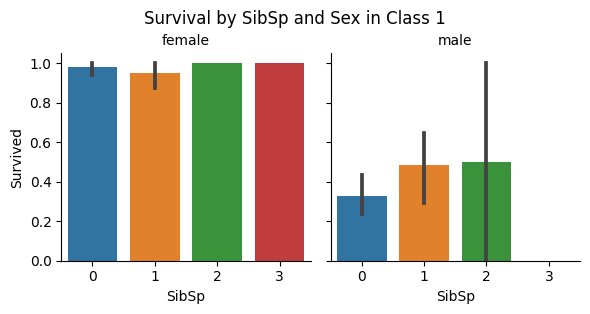

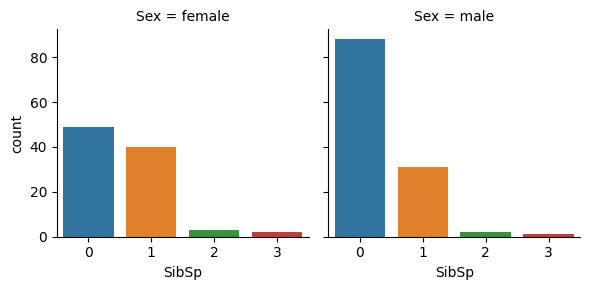

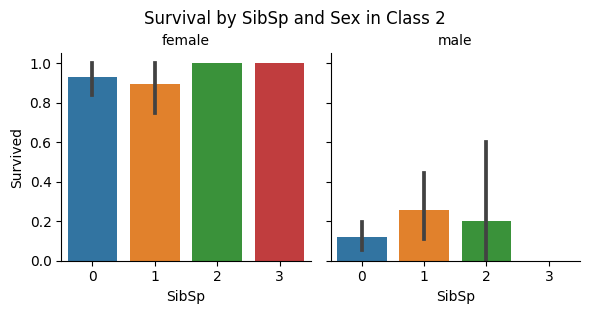

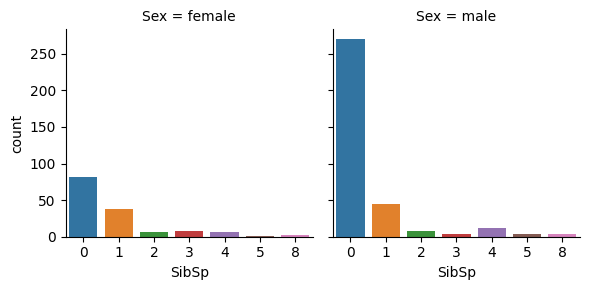

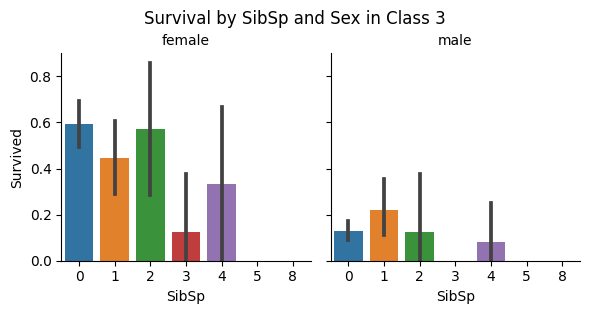

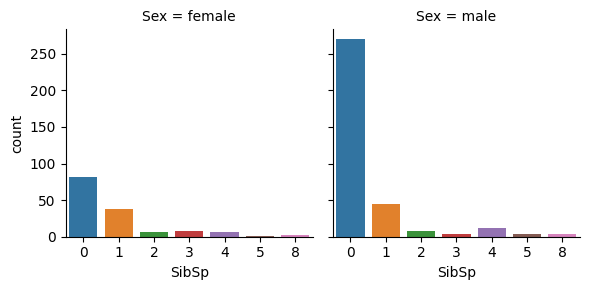

In [20]:
# Survival by SibSp and Sex in Class 1
p1 = sns.catplot(data=train_df[train_df.Pclass == 1], x="SibSp", y="Survived", col="Sex", kind="bar", height=3, aspect=1, col_order=["female", "male"])
p1.set_titles("{col_name}")
p1.fig.suptitle("Survival by SibSp and Sex in Class 1", y=1.03)

sns.catplot(data=train_df[train_df.Pclass == 1], x="SibSp", col="Sex", kind="count", height=3, aspect=1, col_order=["female", "male"])

# Survival by SibSp and Sex in Class 2
p = sns.catplot(data=train_df[train_df.Pclass == 2], x="SibSp", y="Survived", col="Sex", kind="bar", height=3, aspect=1, col_order=["female", "male"])
p.set_titles("{col_name}")
p.fig.suptitle("Survival by SibSp and Sex in Class 2", y=1.03)

sns.catplot(data=train_df[train_df.Pclass == 3], x="SibSp", col="Sex", kind="count", height=3, aspect=1, col_order=["female", "male"])

# Survival by SibSp and Sex in Class 3
p2 = sns.catplot(data=train_df[train_df.Pclass == 3], x="SibSp", y="Survived", col="Sex", kind="bar", height=3, aspect=1, col_order=["female", "male"])
p2.set_titles("{col_name}")
p2.fig.suptitle("Survival by SibSp and Sex in Class 3", y=1.03)

sns.catplot(data=train_df[train_df.Pclass == 3], x="SibSp", col="Sex", kind="count", height=3, aspect=1, col_order=["female", "male"])

plt.show()

#### Observations
Similar to Parch, the SibSp feature does not establish a distinct decision boundary for survival among men in class 1 or women in class 3. 

There appears to be an outlier among women in class 3 with a SibSp value of 3. However, the number of women with these attributes is very small, making it difficult to draw definitive conclusions.


#### Feature Engineering (SibSp and Parch)
Let's compute family size and is alone features to see whether they are better at predicting survival rate

In [21]:
for df in [train_df, test_df]:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [22]:
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [23]:
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


We use tabular view this time and from the above analysis, IsAlone is a better feature because
* it provides a stronger correlation with survival
* it simplifies the model by reducing dimensionality
* binary features often perform better in many ML models.

In [24]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)

#### Feature Engineering (Name)
**Name** is not a useful feature. But we could extract title from it and the model may predict better on the title

In [25]:
for dataset in [train_df, test_df]:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


The titles include both common ones and rare ones. We need to replace titles with a more common name or classify them as `Rare`.

In [26]:
for dataset in [train_df, test_df]:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Since title is just a categorical feature. We'll need to convert the title to categorical value for model to better understand

In [27]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in [train_df, test_df]:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

### Removing Irrelevant or Redundant Features
Some features were removed as they did not contribute useful information for predicting survival:

* **Ticket Number:**  
  - Removed because it is unique to each passenger and does not contribute to survival prediction.

- **Passenger ID:**  
  - Dropped since it is merely an identifier with no predictive value.

* **Name:**  
  - Removed because it does not directly affect survival; however, **title extraction** (e.g., "Mr.", "Mrs.", "Miss.") was performed as titles might provide insights into social status and survival likelihood.


In [28]:
train_df.drop(columns=['PassengerId', 'Ticket', 'Name'], inplace=True)
test_df.drop(columns=['Ticket', 'Name'], inplace=True)

Here, we also want to include a new feature by multiplying age and passenger class. The reason is the both age and passenger class are both important in deciding the survival rate

In [29]:
for dataset in [train_df, test_df]:
    dataset['Age*Pclass'] = dataset.Age * dataset.Pclass
train_df.loc[:, ['Age*Pclass', 'Age', 'Pclass']].head(10)

,Age*Pclass,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


#### Feature Engineering (Sex and Embarked)
Similar to Title feature, we need to convert string value Sex and Embarked to categorical values

In [30]:
for df in [train_df, test_df]:
    df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [31]:
for df in [train_df, test_df]:
    df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

#### Corelation Matrix
We can now check the correlation of the columns. And there doesn't seem strong correlation features

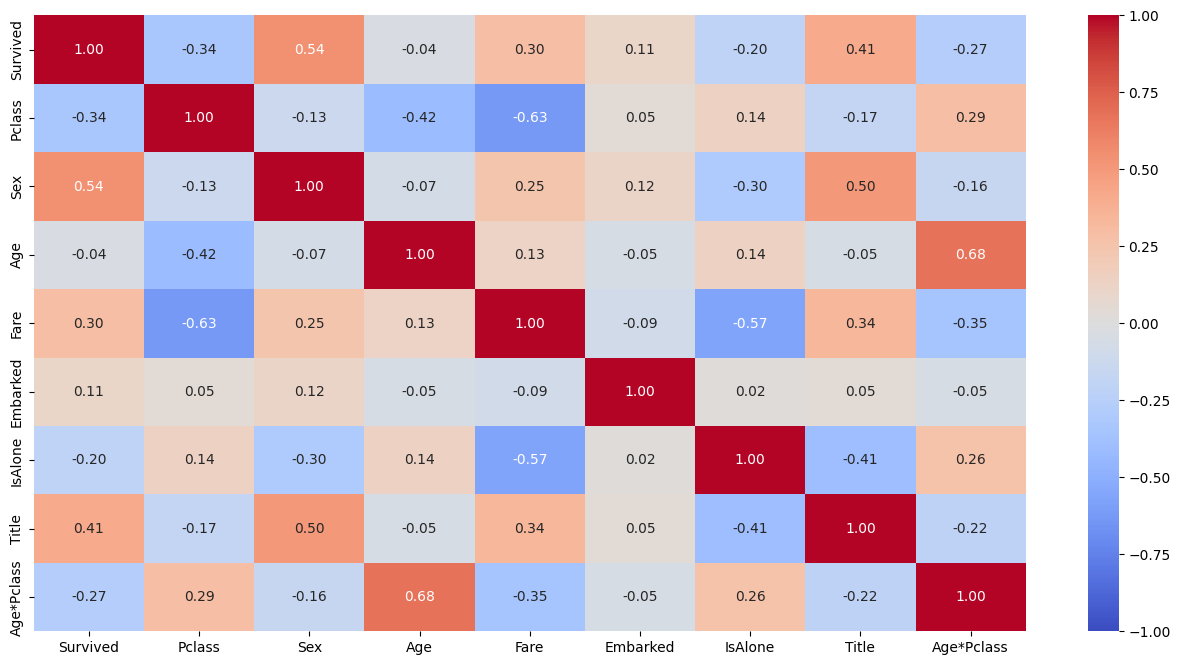

In [32]:
plt.figure(figsize=(16, 8))
sns.heatmap(train_df.corr(),annot=True,cmap='coolwarm', vmin=-1,fmt=".2f")
plt.show()  

### Models and Predictions 
We started with cross-validation to split training and testing data set

In [33]:
datasets = [train_df, test_df]
train_df, test_df = train_test_split(train_df.copy(), test_size=0.3, random_state=0)

In [34]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("Survived", axis=1)
Y_test = test_df["Survived"]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((623, 8), (623,), (268, 8), (268,))

#### Logistic Regression
We can utilize **Logistic Regression** to validate our assumptions and guide feature creation and goal completion. This is achieved by analyzing the coefficients of features in the decision function.

In [35]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = logreg.score(X_test, Y_test)
acc_log

0.7910447761194029

A positive coefficient increases the log-odds of the response, thereby increasing the probability of the outcome, while a negative coefficient decreases the log-odds, reducing the probability.

Among the features, Sex has the highest positive coefficient, indicating that as the Sex value increases (from male: 0 to female: 1), the probability of Survived = 1 increases the most. Conversely, Pclass has the strongest negative impact, meaning that as Pclass increases, the probability of Survived = 1 decreases significantly.

This insight supports the inclusion of Age × Pclass as a valuable artificial feature, as it has a strong negative correlation with survival. Similarly, Title emerges as another useful feature, given its strong positive correlation with survival.

In [36]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.121092
6,Title,0.477574
4,Embarked,0.286085
5,IsAlone,0.151057
7,Age*Pclass,-0.127027
3,Fare,-0.232218
2,Age,-0.357980
0,Pclass,-1.193201


Let's check the ROC and AUC for the **Logistic Regression**. The result is actually not bad with 0.791 accuracy and 0.85 AUC

The accuracy is  0.7910447761194029


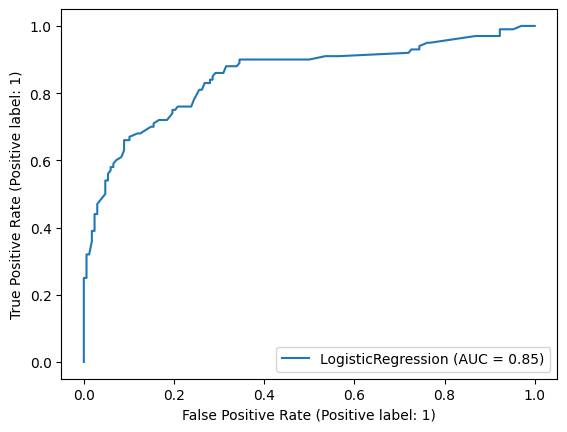

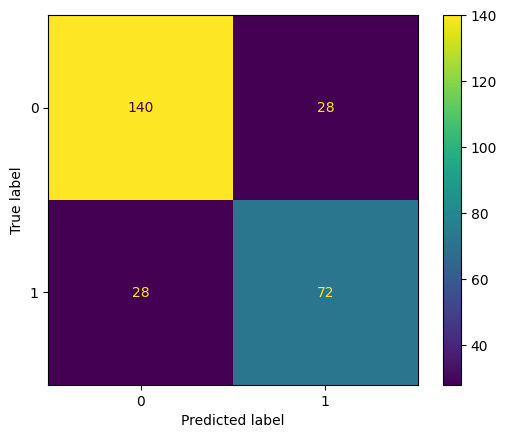

In [37]:
def plotOutput(clf):
    acc = clf.score(X_test, Y_test)
    print('The accuracy is ', acc)
    RocCurveDisplay.from_estimator(clf, X_test, Y_test)
    plt.show()
    cm = confusion_matrix(Y_test, Y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=clf.classes_)
    disp.plot()
    plt.show()
    
    return acc
_ = plotOutput(logreg)

#### Support Vector Machines
Do the same for **Support Vector Machines** and the result is almost good as Logistic Regression.

The accuracy is  0.8022388059701493


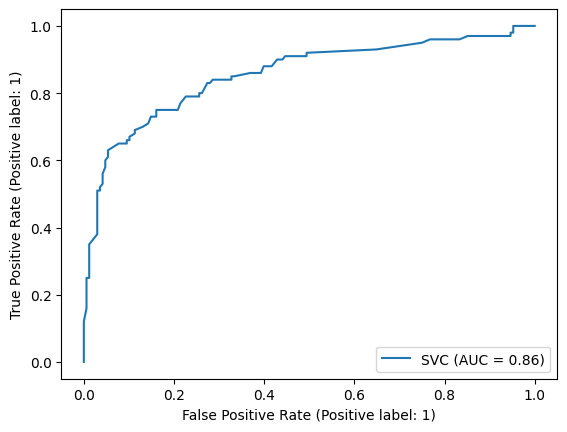

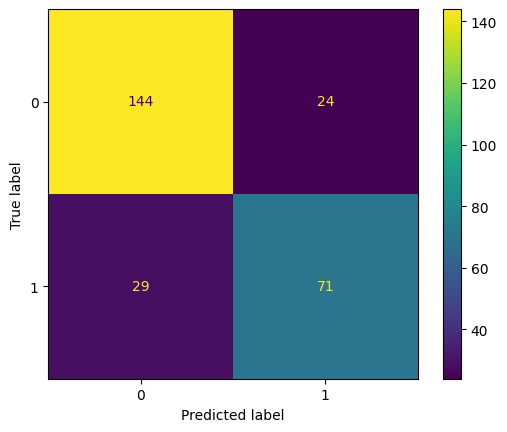

In [38]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = plotOutput(svc)

#### KNN
**KNN** achieved the similar performance.

The accuracy is  0.7985074626865671


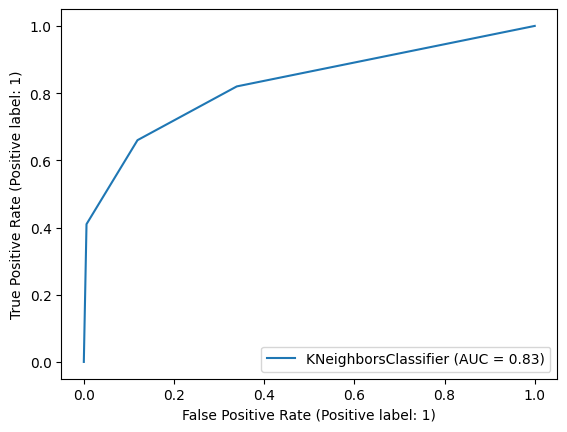

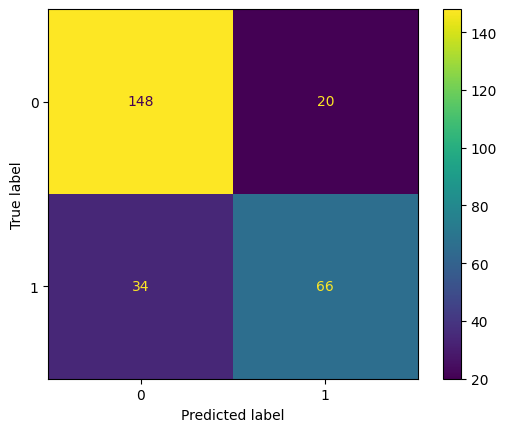

In [39]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = plotOutput(knn)

#### Naive Bayes
**Naive Bayes** actually performed worse. 

The accuracy is  0.7761194029850746


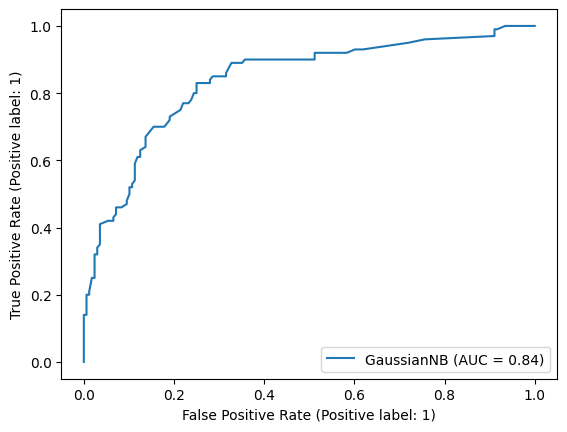

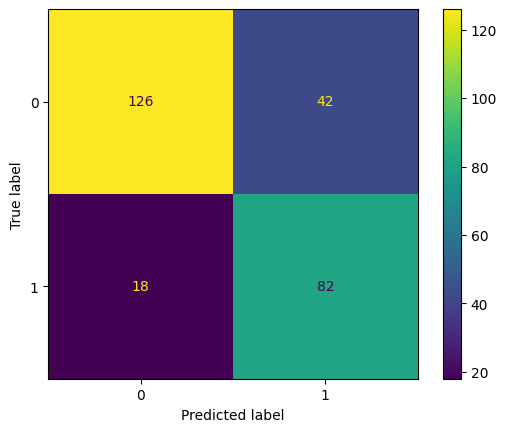

In [40]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = plotOutput(gaussian)

#### Perceptron
**Perceptron** has near 0.39 accuracy. It indicates Perceptron isn't a good method to solve this small data set prediction

The accuracy is  0.3917910447761194


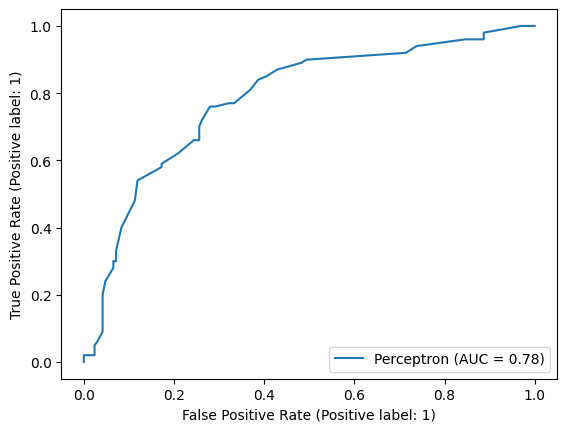

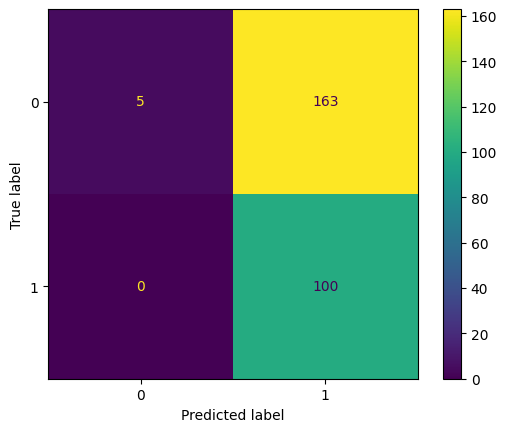

In [41]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = plotOutput(perceptron)

#### Linear SVC
**Linear SVC** got accuracy as 0.78

The accuracy is  0.7835820895522388


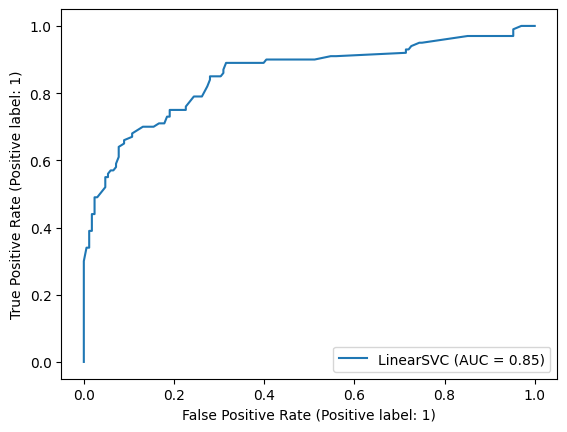

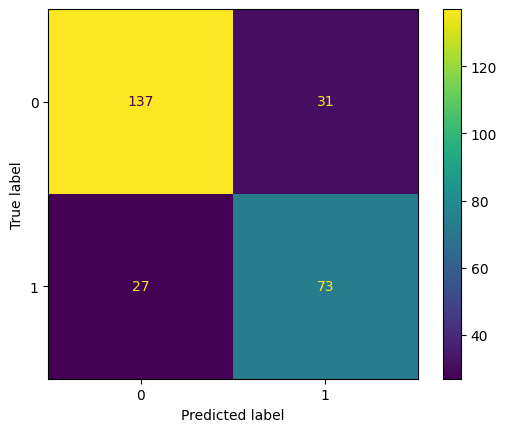

In [42]:
linear_svc = LinearSVC(max_iter=5000)
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = plotOutput(linear_svc)

#### Stochastic Gradient Decent

The accuracy is  0.753731343283582


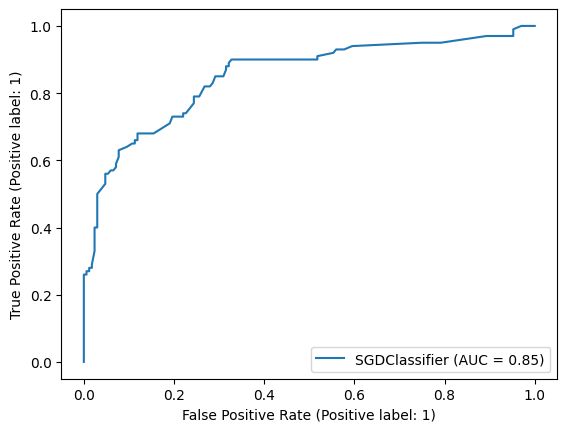

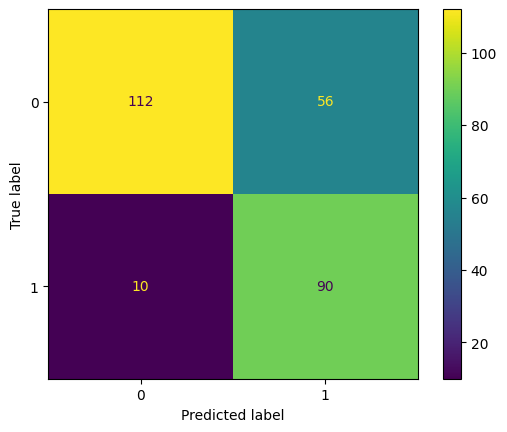

In [43]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = plotOutput(sgd)

#### Decision Tree

The accuracy is  0.8171641791044776


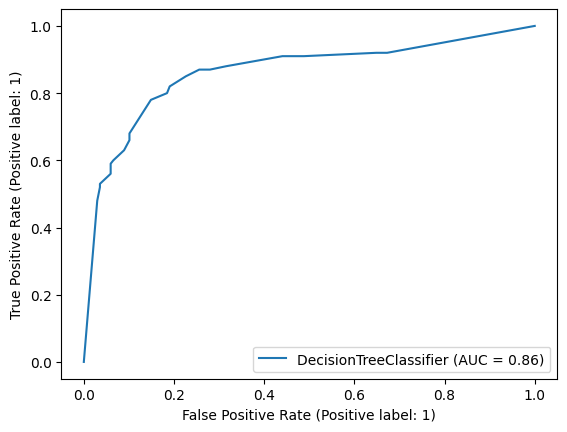

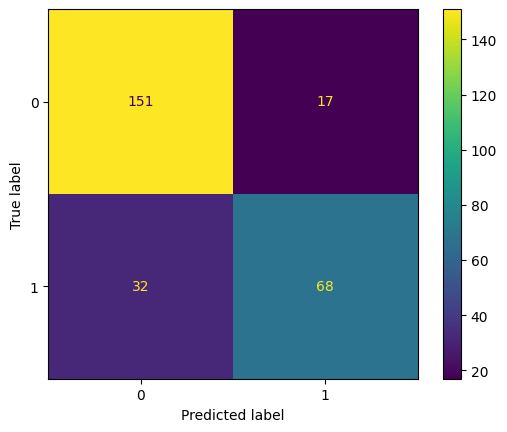

In [44]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = plotOutput(decision_tree)

#### Random Forest

The accuracy is  0.8283582089552238


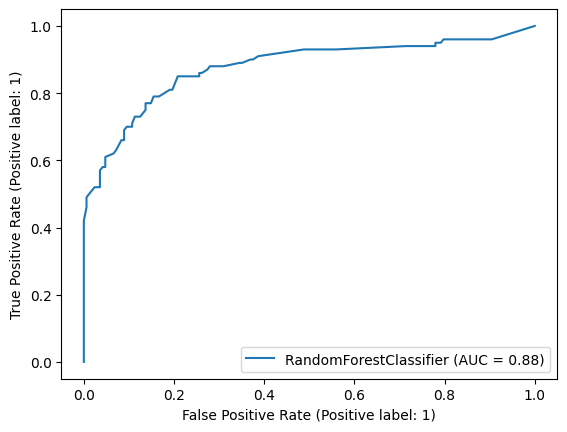

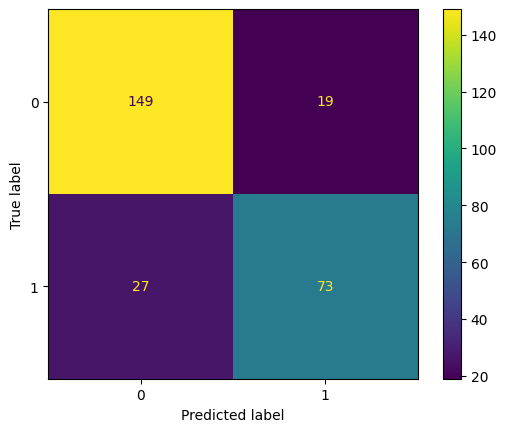

In [45]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = plotOutput(random_forest)

### Model evaluation

We can now rank our evaluation of all the models to determine the best one for our problem. 

In [46]:
models = pd.DataFrame({
    # 'Clf': [svc, knn, logreg, random_forest, gaussian, perceptron, sgd, linear_svc, decision_tree],
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]
})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.828358
8,Decision Tree,0.817164
0,Support Vector Machines,0.802239
1,KNN,0.798507
2,Logistic Regression,0.791045
7,Linear SVC,0.783582
4,Naive Bayes,0.776119
6,Stochastic Gradient Decent,0.753731
5,Perceptron,0.391791


The result table is better visualization of the analysis we just performed. Basically emsembling method (random forest) perform the best with the highest accuracy score and area under curve score. 

### Hyperparameter Tuning



The accuracy is  0.8208955223880597


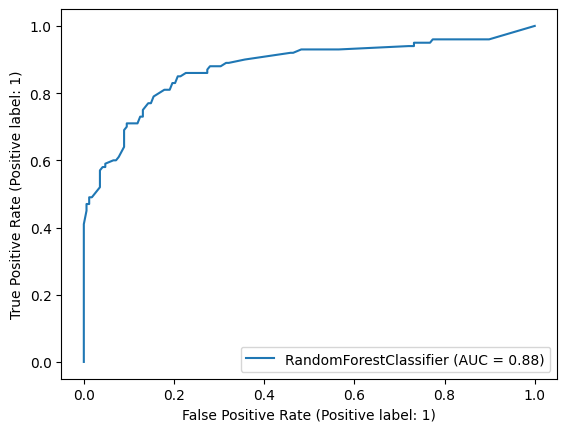

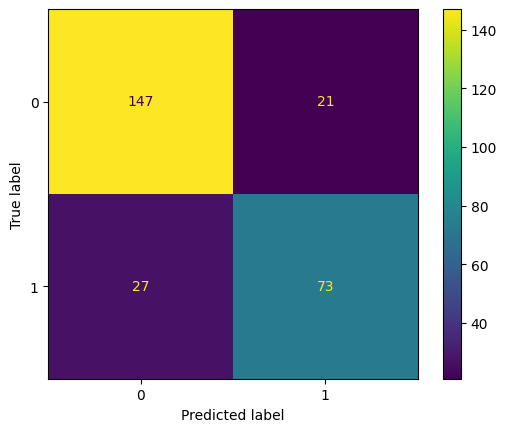

The accuracy is  0.835820895522388


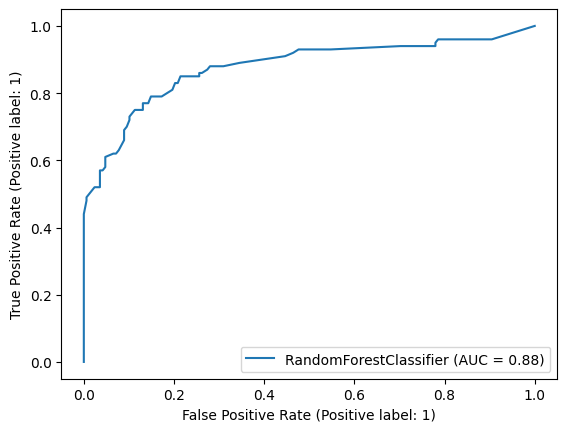

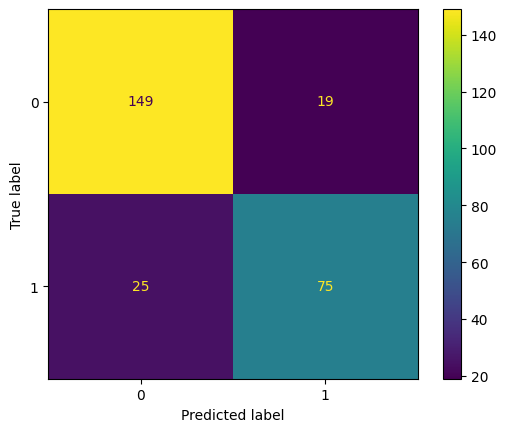

The accuracy is  0.832089552238806


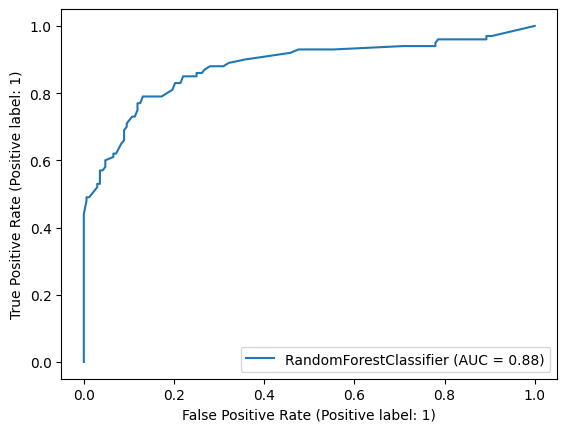

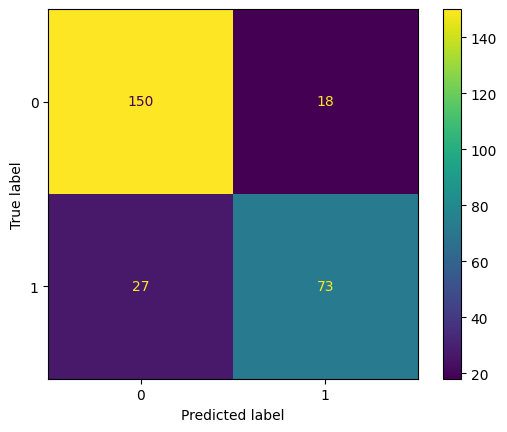

In [47]:
models = []
for n in [50, 150, 250]:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, Y_train)
    Y_pred = rf.predict(X_test)
    rf.score(X_train, Y_train)
    plotOutput(rf)
    models.append(rf)

best_model = models[1]

After testing different values for the n_estimators hyperparameter (50, 150, and 250), we observed that the best-performing value was actually 150. 

##### Explanation
* What is n_estimators?
  * The n_estimators parameter in ensemble models like Random Forest and Gradient Boosting determines the number of trees in the ensemble. Increasing the number of trees can improve accuracy but may also lead to diminishing returns or overfitting.
* Why is 150 the best?
  * The result shows that a lower value have resulted in underfitting while higher values did not signifcantly improve accuracy. 
  * The data size is less than 700 which means more trees would result in overfitting. 

In [48]:
original_test_df = datasets[1]
Y_pred = best_model.predict(original_test_df.drop('PassengerId', axis=1))
submission = pd.DataFrame({
    "PassengerId": original_test_df["PassengerId"],
    "Survived": Y_pred
})
submission.to_csv('/kaggle/working/submission.csv', index=False)

## Discussion and Conclusion

### Key Learnings and Takeaways
Through the analysis of the Titanic dataset, several key insights were uncovered:
- **Feature Importance**: Certain features like **Sex, Age, Pclass, and Fare** played significant roles in predicting survival rates.
- **Data Imputation**: Handling missing values, particularly for Age and Embarked, was crucial in improving model performance.
- **Feature Engineering**: Creating new features, such as **Title extraction from Names** and **Is Alone**, improved predictive power.

### Challenges Encountered
- **Model Performance Variations**: Logistic Regression and Random Forest performed well, but models like K-Nearest Neighbors (KNN) struggled due to sensitivity to scaling and feature selection.
- **Imbalanced Data**: The dataset contained an imbalance in survival rates between different classes and genders, which influenced the model results.

### Potential Improvements
- **Hyperparameter Tuning**: Optimizing hyperparameters further (e.g., GridSearchCV) could enhance model performance.
- **Feature Selection and Engineering**: Additional feature engineering, such as extracting cabin information or using NLP techniques on passenger names, could provide new insights.
- **Ensemble Learning**: Combining multiple models (e.g., blending Random Forest and Gradient Boosting) may yield better predictive accuracy.

### Final Thoughts
This project demonstrated the **end-to-end data science workflow**, including data cleaning, exploration, feature engineering, model building, and evaluation. While the models achieved reasonable accuracy, further refinements in feature selection, hyperparameter tuning, and model ensembling could further improve performance. Future work could also explore deep learning approaches or integrating external datasets for richer insights.